In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import altair as alt
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
import plotly.graph_objects as go

In [ ]:
data = pd.read_csv('/content/hOUSE_PRICE.csv')
df = data
df.isnull().sum()

Unnamed: 0         0
City               0
Price              0
Area               0
Location           0
No. of Bedrooms    0
dtype: int64

In [ ]:
data.head(10)

,Unnamed: 0,City,Price,Area,Location,No. of Bedrooms
0,0,Bangalore,30000000,3340,JP Nagar Phase 1,4
1,1,Bangalore,7888000,1045,Dasarahalli on Tumkur Road,2
2,2,Bangalore,4866000,1179,Kannur on Thanisandra Main Road,2
3,3,Bangalore,8358000,1675,Doddanekundi,3
4,4,Bangalore,6845000,1670,Kengeri,3
5,5,Bangalore,6797000,1220,Horamavu,2
6,6,Bangalore,20000000,2502,Thanisandra,4
7,7,Bangalore,7105000,1438,Ramamurthy Nagar,3
8,8,Bangalore,8405000,1405,Whitefield Hope Farm Junction,3
9,9,Bangalore,3506000,660,Electronic City Phase 1,1


In [ ]:
df = data.drop('Unnamed: 0',axis = 1)

# Feature Engineering

In [ ]:
df['price_per_sqft'] = df['Price']/df['Area']

# Exploratory Data Analysis (EDA)

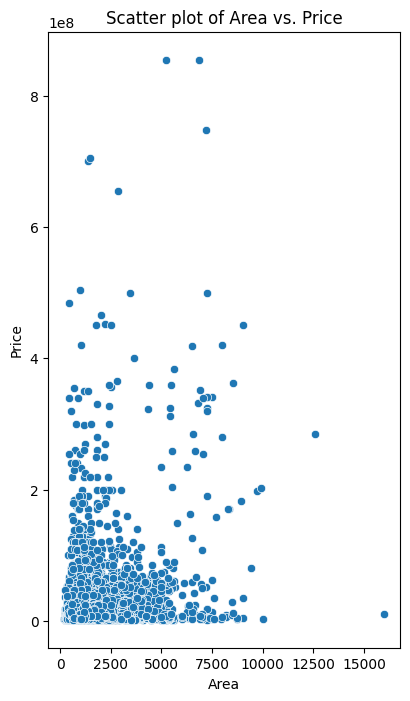

In [ ]:
plt.figure(figsize= (10,8))
plt.subplot(1, 2, 2)
sns.scatterplot(x='Area', y='Price', data=df)
plt.title('Scatter plot of Area vs. Price')
plt.show()

# Descriptive Statistics with Matplotlib

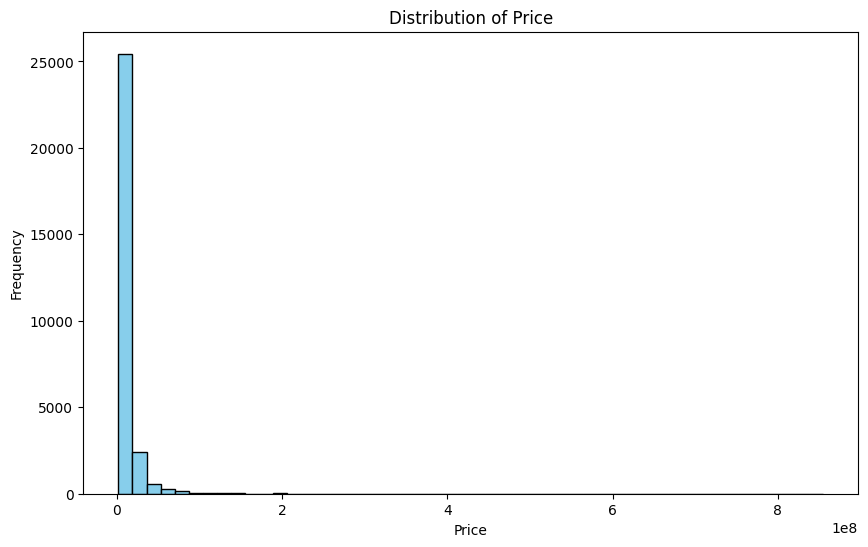

In [ ]:
plt.figure(figsize = (10,6))
plt.hist(df['Price'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


# 3D Scatter plot with Plotly

In [ ]:
fig = px.scatter_3d(df, x='Area', y='Price', z='No. of Bedrooms', title='3D Scatter plot')
fig.show()

# Descriptive Statistics:

In [ ]:
summary_stats = df[['Price', 'Area']].describe()
print(summary_stats)

              Price          Area
count  2.913500e+04  29135.000000
mean   1.195267e+07   1301.816475
std    2.387647e+07    767.862339
min    2.000000e+06    200.000000
25%    4.179999e+06    870.000000
50%    6.884999e+06   1137.000000
75%    1.230000e+07   1504.000000
max    8.546000e+08  16000.000000


# Data Cleaning:

In [ ]:
missing_city_count = df['City'].isnull().sum()
print(f'Missing values in City column: {missing_city_count}')
# To handle missing values, you can use df['City'].fillna('Unknown', inplace=True) or drop rows with missing values.


Missing values in City column: 0


# Feature Engineering:


In [ ]:
df['Price_per_sqft'] = df['Price'] / df['Area']
print(df.head())


        City     Price  Area                         Location  \
0  Bangalore  30000000  3340                 JP Nagar Phase 1   
1  Bangalore   7888000  1045       Dasarahalli on Tumkur Road   
2  Bangalore   4866000  1179  Kannur on Thanisandra Main Road   
3  Bangalore   8358000  1675                     Doddanekundi   
4  Bangalore   6845000  1670                          Kengeri   

   No. of Bedrooms  price_per_sqft  Price_per_sqft  
0                4     8982.035928     8982.035928  
1                2     7548.325359     7548.325359  
2                2     4127.226463     4127.226463  
3                3     4989.850746     4989.850746  
4                3     4098.802395     4098.802395  


# Correlation Analysis:

In [ ]:
c_m = df.groupby('City')[['Price','No. of Bedrooms']].corr()
print(c_m)

                              Price  No. of Bedrooms
City                                                
Bangalore Price            1.000000         0.230004
          No. of Bedrooms  0.230004         1.000000
Chennai   Price            1.000000         0.293396
          No. of Bedrooms  0.293396         1.000000
Delhi     Price            1.000000         0.191504
          No. of Bedrooms  0.191504         1.000000
Hyderabad Price            1.000000         0.597931
          No. of Bedrooms  0.597931         1.000000
Kolkata   Price            1.000000         0.035236
          No. of Bedrooms  0.035236         1.000000
Mumbai    Price            1.000000         0.253754
          No. of Bedrooms  0.253754         1.000000


# Exploratory Data Analysis (EDA):

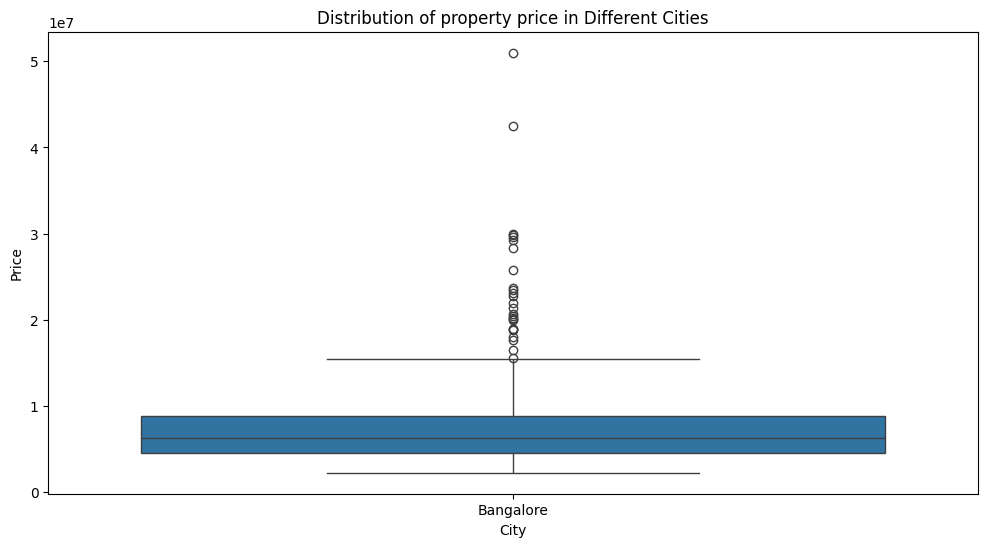

In [ ]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'City',y = 'Price',data=df.head(500))
plt.title('Distribution of property price in Different Cities')
plt.show()

# Predictive Modeling:

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
x = df[['Area','No. of Bedrooms']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print(f'Mean Squared Error : {mse}')

Mean Squared Error : 705995332434838.0
